In [1]:
library(tidyverse)
library(ggplot2)

setwd("~/Repositories/AirQualityCOVID/")

── Attaching packages ───────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ──────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
variable <- "no2"
method <- "lm"

In [8]:
load(paste("data/Analysis/predictions-",
                          method,"-", variable,".rda", sep=""))
results <- results %>% filter(pred.qq != 0)
results$diff <- 100*(results$obs - results$pred.qq) / results$pred.qq 

In [9]:
sites.lv <- read.csv("data/Curation/checked_AQ.csv") %>%
            filter(Pollutant == variable) 

results <- merge(sites.lv,
                results,
                by = "site", all.y=T
               ) %>% 
        group_by(date, Municipio) %>%
        summarise(diff = mean(diff, na.rm=T))

`summarise()` has grouped output by 'date'. You can override using the `.groups` argument.



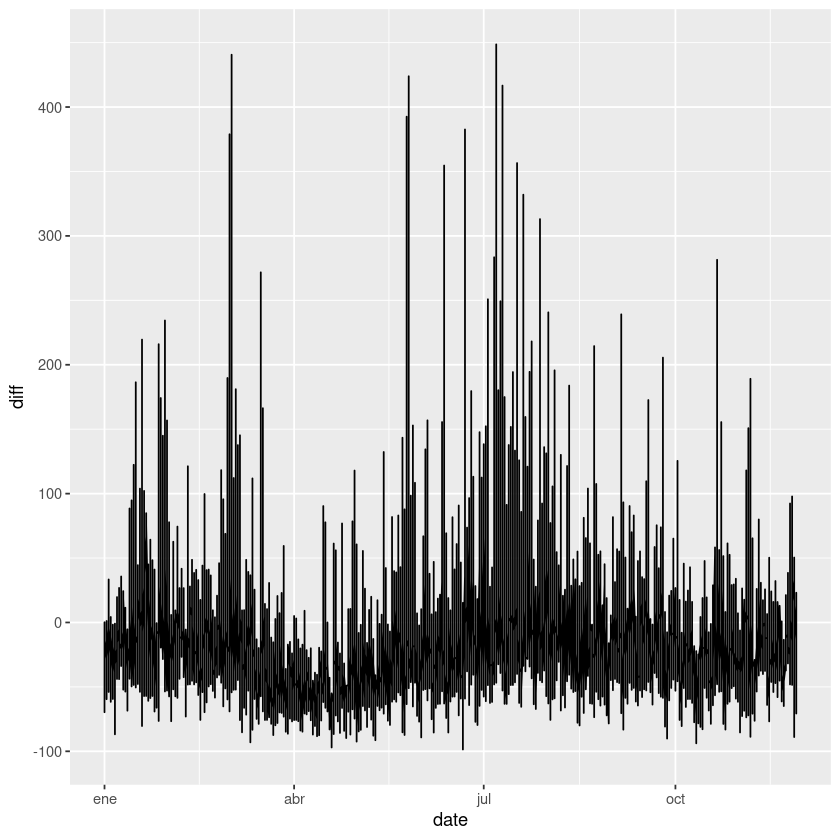

In [10]:
source("src/Cross-validation/preProcess.R")

#results <- filter.IQR(results, columns = "diff", 3)

ggplot(results) +
    geom_line(aes(x=date, diff))

In [11]:
write.csv(results %>% select (date, Municipio, diff), "data/results.csv", row.names=F)